## Imports

In [23]:
%matplotlib inline

import os
import sys
import re
import nltk
import json
import gensim
import datetime
import dateutil
import datetime
import scipy as sp
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import xgboost as xgb
from utils import metrics
from scipy import sparse
from urllib import request
from sklearn.svm import SVC
from functools import reduce
from datetime import datetime
from utils import featureScore
from utils import folderPath
from utils import normalizing
from utils import clean_dataset
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from IPython.display import Image
from typing import List, Callable, Dict
from sklearn.metrics import r2_score
sns.set(style="ticks", color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from utils import hyperparameterTuning_RandomForest
from utils import hyperparameterTuning_XGBoost
from utils import removeColumnContainString
from utils import hyperparameterTuning_MLP
from utils import plot_feature_importance
from utils import Feature_Extraction

import os, shutil 

random_state=2022

In [24]:
!pip install fsspec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
figurePath=folderPath('SavedFigures')
datasetePath=folderPath('Dataset')

1
1


In [26]:
dataset1='/content/drive/MyDrive/NLP/data.csv'
dataset2='/content/drive/MyDrive/NLP/Industry.csv'

In [27]:
df=pd.read_csv(dataset1)
industry=pd.read_csv(dataset2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
df.shape

(88516, 37)

In [29]:
industry.shape

(834, 4)

In [30]:
dropped = ['Unnamed: 0','Unnamed: 0.1','image_type', 'profile_image_link','id', 'url','external_url','media_type','is_verified','image_url.1','url','input_account','input_posts_number','input_date_of_post','input_post_type','input_stop_id','warning','error','tags','confidence_score','accent_color','is_bw','dominant_colors','bg_color','fore_color','industry','_category','region']
data = df.drop(dropped,axis=1)
data = data[data['account'].notna()]
data

,account,caption,profile_name,biography,following,likes,posts_count,followers,datetime,comments
0,yeastbakery,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,29.0,280.0,8702.0,1.626600e+12,0.0
1,yeastbakery,New cakes on our counters 😋😋,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,44.0,280.0,8702.0,1.646920e+12,0.0
2,yeastbakery,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,209.0,280.0,8702.0,1.634730e+12,9.0
3,yeastbakery,"New addition to our selection of sandwiches, o...",Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,95.0,280.0,8702.0,1.633090e+12,3.0
4,yeastbakery,We are currently closed as we move into our ne...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,101.0,280.0,8702.0,1.626930e+12,6.0
...,...,...,...,...,...,...,...,...,...,...
88509,sandysfishmongers,Day 2 Christmas brochure tour Day one brochure...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,10.0,1863.0,2321.0,1.636710e+12,1.0
88510,sandysfishmongers,#ArmisticeDay #poppy #lestwerespect,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,50.0,1863.0,2321.0,1.636620e+12,0.0
88511,sandysfishmongers,There’s only one turkey and the best place to ...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,8.0,1863.0,2321.0,1.636550e+12,0.0
88512,sandysfishmongers,Day one brochure tour !! #sandysfishmongers #b...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,9.0,1863.0,2321.0,1.636550e+12,0.0


In [31]:
len(data.account.unique())

981

In [32]:
# data.drop(['Unnamed: 0'], axis = 1,inplace=True)
df_industry=industry.rename(columns={'ACCOUNT':'account'})
df_industry.head()

data=pd.merge(data, df_industry, on=['account'], how='left')

In [33]:
data.head()

,account,caption,profile_name,biography,following,likes,posts_count,followers,datetime,comments,INDUSTRY,SUB-CATEGORY,REGION
0,yeastbakery,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,29.0,280.0,8702.0,1.626600e+12,0.0,hospitality,bakery,UK
1,yeastbakery,New cakes on our counters 😋😋,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,44.0,280.0,8702.0,1.646920e+12,0.0,hospitality,bakery,UK
2,yeastbakery,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,209.0,280.0,8702.0,1.634730e+12,9.0,hospitality,bakery,UK
3,yeastbakery,"New addition to our selection of sandwiches, o...",Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,95.0,280.0,8702.0,1.633090e+12,3.0,hospitality,bakery,UK
4,yeastbakery,We are currently closed as we move into our ne...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,101.0,280.0,8702.0,1.626930e+12,6.0,hospitality,bakery,UK


In [34]:
data['caption_length'] = data['caption'].str.len()
data['biography_length'] = data['biography'].str.len()
data['po_co'] = data['posts_count']/(data['comments']+1)
data['pof'] = data['posts_count']/(data['following']+1)
data['user_count'] = data.groupby('account')['posts_count'].transform('count')
data['profile_name_len'] = data['profile_name'].str.len()
data['fol'] = data['followers']/(data['following']+1)
data['act'] = data['comments']/(data['followers']+1)
data['pos'] = data['posts_count']/(data['followers']+1)
data['comments_max'] = data.groupby('account')['comments'].transform('max')
data['comments_min'] = data.groupby('account')['comments'].transform('min')
data['comments_mean'] = data.groupby('account')['comments'].transform('mean')
data['comments_std'] = data.groupby('account')['comments'].transform('std')
data['comments_followers']=data['comments']*data['followers']
data['followers_comments_mean']=data['comments_mean']*data['followers']
data['fol2']=data['fol']*data['fol']
data['fol_pos']=data['fol']*data['pos']
data['fol_pow'] = data['followers']*(data['following'])
data['po_co_pow'] = data['posts_count']*(data['comments'])
data['comments_mean_diff'] = data['comments'] / (data['comments_mean']+1)

In [35]:
 data.groupby('account')['posts_count'].transform('count')

0         60
1         60
2         60
3         60
4         60
        ... 
88509    111
88510    111
88511    111
88512    111
88513    111
Name: posts_count, Length: 88514, dtype: int64

In [36]:
data['INDUSTRY'].value_counts()

hospitality           43812
cosmetics               846
retail                  666
fitness                 607
sport & recreation      274
real estate             168
fashion                 128
childcare               106
Name: INDUSTRY, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

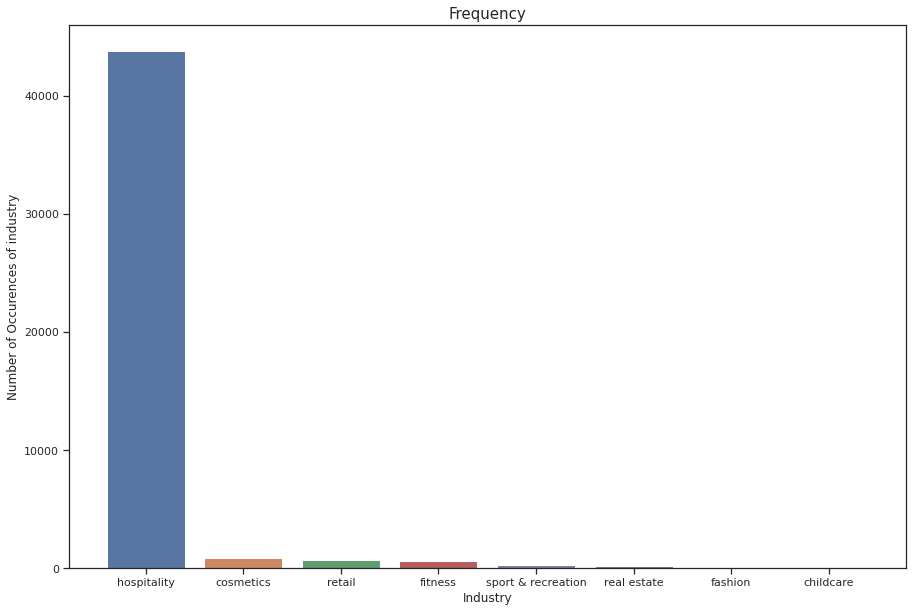

In [37]:
countIndustry=data['INDUSTRY'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countIndustry.index,countIndustry.values)
plt.ylabel('Number of Occurences of industry',fontsize=12)
plt.xlabel('Industry',fontsize=12)
plt.title('Frequency',fontsize=15)
plt.plot()

In [38]:
data['SUB-CATEGORY'].value_counts()

restaurant                                             14931
hotel                                                  11030
bakery                                                 10317
café                                                    3650
beauty clinic                                            687
bar                                                      506
breakfast & brunch restaurant                            319
cocktail bar                                             276
gym                                                      268
pub                                                      257
beer garden                                              245
florist                                                  233
brewery                                                  215
boutique wellness studio                                 200
fast food chain                                          200
bar & grill                                              196
paddleboard rental      

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

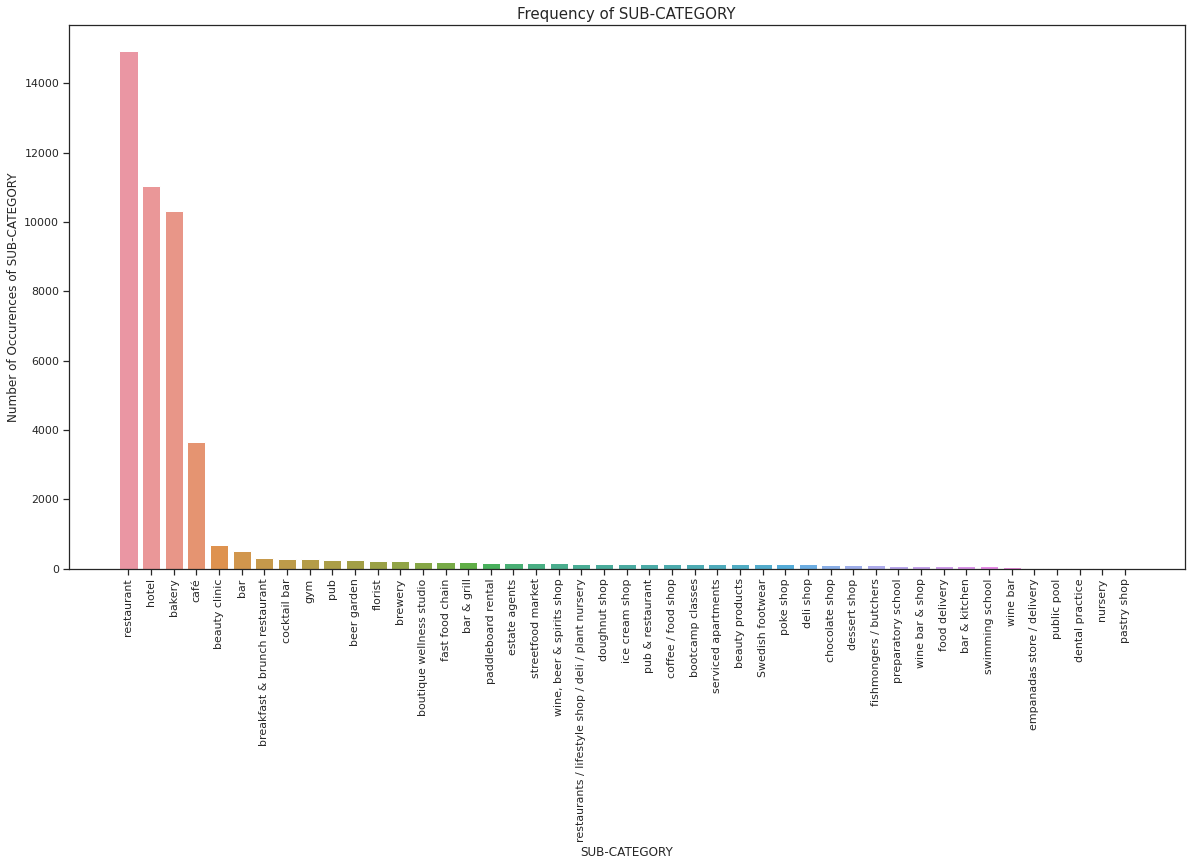

In [39]:
countSubIndustry=data['SUB-CATEGORY'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(countSubIndustry.index,countSubIndustry.values)
plt.ylabel('Number of Occurences of SUB-CATEGORY',fontsize=12)
plt.xlabel('SUB-CATEGORY',fontsize=12)
plt.xticks(rotation=90)
plt.title('Frequency of SUB-CATEGORY',fontsize=15)
# plt.xticks(ticks=countDow.index,rotation='vertical')
plt.plot()

In [40]:
data = pd.get_dummies(data, columns=['INDUSTRY'])

In [41]:
data.drop(['account'], axis = 1,inplace=True)
data.drop(['SUB-CATEGORY'], axis = 1,inplace=True)
# data.drop(['Unnamed: 0'], axis = 1,inplace=True)

In [42]:
data

,caption,profile_name,biography,following,likes,posts_count,followers,datetime,comments,REGION,...,po_co_pow,comments_mean_diff,INDUSTRY_childcare,INDUSTRY_cosmetics,INDUSTRY_fashion,INDUSTRY_fitness,INDUSTRY_hospitality,INDUSTRY_real estate,INDUSTRY_retail,INDUSTRY_sport & recreation
0,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,29.0,280.0,8702.0,1.626600e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,1,0,0,0
1,New cakes on our counters 😋😋,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,44.0,280.0,8702.0,1.646920e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,1,0,0,0
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,209.0,280.0,8702.0,1.634730e+12,9.0,UK,...,2520.0,1.313869,0,0,0,0,1,0,0,0
3,"New addition to our selection of sandwiches, o...",Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,95.0,280.0,8702.0,1.633090e+12,3.0,UK,...,840.0,0.437956,0,0,0,0,1,0,0,0
4,We are currently closed as we move into our ne...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,101.0,280.0,8702.0,1.626930e+12,6.0,UK,...,1680.0,0.875912,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,Day 2 Christmas brochure tour Day one brochure...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,10.0,1863.0,2321.0,1.636710e+12,1.0,UK,...,1863.0,0.549505,0,0,0,0,0,0,1,0
88510,#ArmisticeDay #poppy #lestwerespect,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,50.0,1863.0,2321.0,1.636620e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,0,0,1,0
88511,There’s only one turkey and the best place to ...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,8.0,1863.0,2321.0,1.636550e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,0,0,1,0
88512,Day one brochure tour !! #sandysfishmongers #b...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,9.0,1863.0,2321.0,1.636550e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,0,0,1,0


In [43]:
#Converting the columns into the float datatype
a=['following','likes','posts_count','followers','comments']
for i in a:
  data[i]= data[i].astype(str).astype(float)
data

,caption,profile_name,biography,following,likes,posts_count,followers,datetime,comments,REGION,...,po_co_pow,comments_mean_diff,INDUSTRY_childcare,INDUSTRY_cosmetics,INDUSTRY_fashion,INDUSTRY_fitness,INDUSTRY_hospitality,INDUSTRY_real estate,INDUSTRY_retail,INDUSTRY_sport & recreation
0,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,29.0,280.0,8702.0,1.626600e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,1,0,0,0
1,New cakes on our counters 😋😋,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,44.0,280.0,8702.0,1.646920e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,1,0,0,0
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,209.0,280.0,8702.0,1.634730e+12,9.0,UK,...,2520.0,1.313869,0,0,0,0,1,0,0,0
3,"New addition to our selection of sandwiches, o...",Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,95.0,280.0,8702.0,1.633090e+12,3.0,UK,...,840.0,0.437956,0,0,0,0,1,0,0,0
4,We are currently closed as we move into our ne...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,101.0,280.0,8702.0,1.626930e+12,6.0,UK,...,1680.0,0.875912,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,Day 2 Christmas brochure tour Day one brochure...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,10.0,1863.0,2321.0,1.636710e+12,1.0,UK,...,1863.0,0.549505,0,0,0,0,0,0,1,0
88510,#ArmisticeDay #poppy #lestwerespect,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,50.0,1863.0,2321.0,1.636620e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,0,0,1,0
88511,There’s only one turkey and the best place to ...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,8.0,1863.0,2321.0,1.636550e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,0,0,1,0
88512,Day one brochure tour !! #sandysfishmongers #b...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,9.0,1863.0,2321.0,1.636550e+12,0.0,UK,...,0.0,0.000000,0,0,0,0,0,0,1,0


## DateTime Features

In [44]:
data = data[data['datetime'].notna()]

In [45]:
import datetime

def timeStampConversion(x):
    return datetime.datetime.fromtimestamp(int(x)/1000)

data['datetime'] = pd.to_numeric(data['datetime'], downcast="float")
data['datetime'] = data['datetime'].apply(lambda x: timeStampConversion(x)) 
data["datetime"] = pd.to_datetime(data["datetime"])

In [46]:
data['Dow'] = data['datetime'].dt.weekday
data['Hod']= data['datetime'].dt.hour
data['Date']= data['datetime'].dt.date

In [47]:
data

,caption,profile_name,biography,following,likes,posts_count,followers,datetime,comments,REGION,...,INDUSTRY_cosmetics,INDUSTRY_fashion,INDUSTRY_fitness,INDUSTRY_hospitality,INDUSTRY_real estate,INDUSTRY_retail,INDUSTRY_sport & recreation,Dow,Hod,Date
0,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,29.0,280.0,8702.0,2021-07-18 09:19:41.056,0.0,UK,...,0,0,0,1,0,0,0,6,9,2021-07-18
1,New cakes on our counters 😋😋,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,44.0,280.0,8702.0,2022-03-10 13:45:42.144,0.0,UK,...,0,0,0,1,0,0,0,3,13,2022-03-10
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,209.0,280.0,8702.0,2021-10-20 11:39:44.000,9.0,UK,...,0,0,0,1,0,0,0,2,11,2021-10-20
3,"New addition to our selection of sandwiches, o...",Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,95.0,280.0,8702.0,2021-10-01 12:06:51.136,3.0,UK,...,0,0,0,1,0,0,0,4,12,2021-10-01
4,We are currently closed as we move into our ne...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,101.0,280.0,8702.0,2021-07-22 05:00:20.352,6.0,UK,...,0,0,0,1,0,0,0,3,5,2021-07-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,Day 2 Christmas brochure tour Day one brochure...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,10.0,1863.0,2321.0,2021-11-12 09:39:17.632,1.0,UK,...,0,0,0,0,0,1,0,4,9,2021-11-12
88510,#ArmisticeDay #poppy #lestwerespect,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,50.0,1863.0,2321.0,2021-11-11 08:40:42.240,0.0,UK,...,0,0,0,0,0,1,0,3,8,2021-11-11
88511,There’s only one turkey and the best place to ...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,8.0,1863.0,2321.0,2021-11-10 13:14:09.792,0.0,UK,...,0,0,0,0,0,1,0,2,13,2021-11-10
88512,Day one brochure tour !! #sandysfishmongers #b...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,9.0,1863.0,2321.0,2021-11-10 13:14:09.792,0.0,UK,...,0,0,0,0,0,1,0,2,13,2021-11-10


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

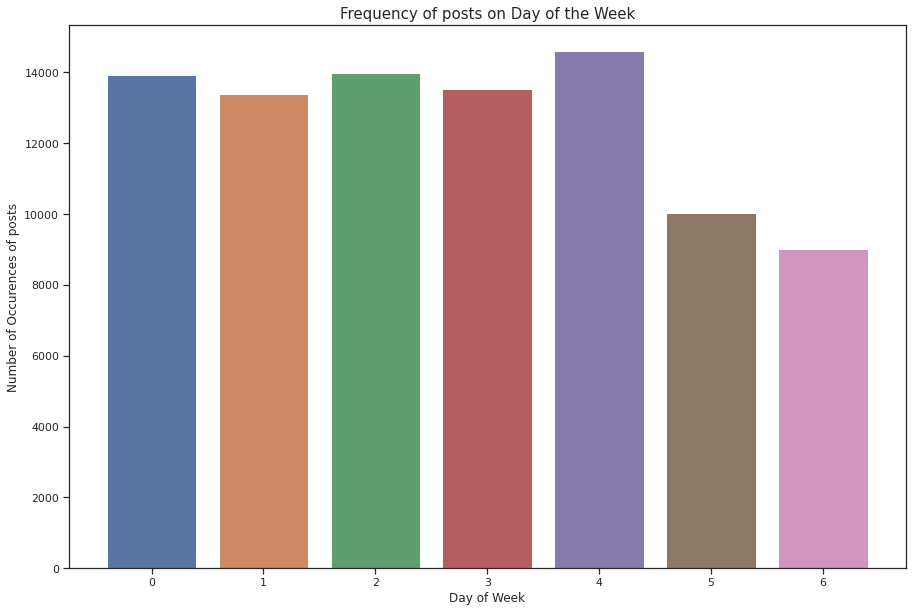

In [48]:
countDow=data['Dow'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countDow.index,countDow.values)
plt.ylabel('Number of Occurences of posts',fontsize=12)
plt.xlabel('Day of Week',fontsize=12)
plt.title('Frequency of posts on Day of the Week',fontsize=15)
# plt.xticks(ticks=countDow.index,rotation='vertical')
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


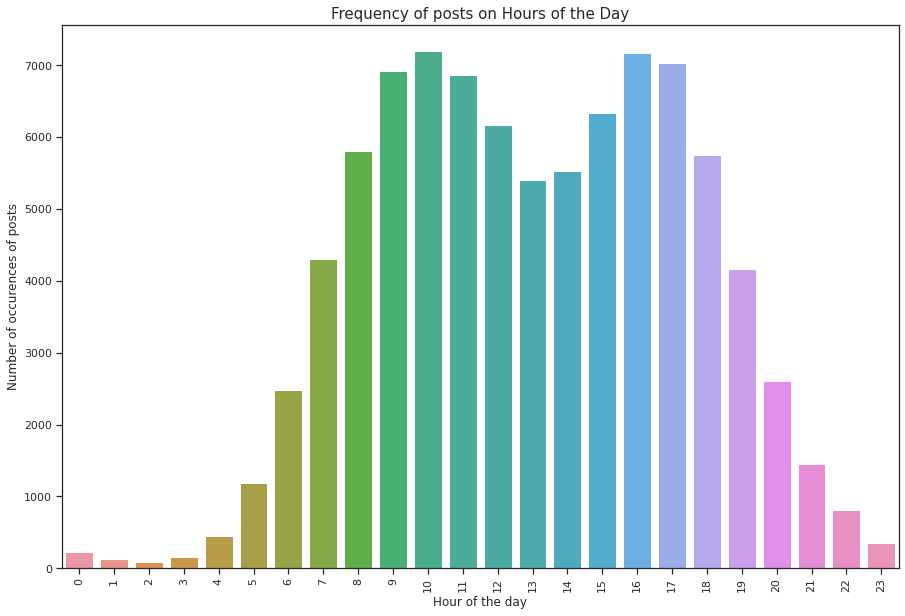

In [49]:
countHour=data['Hod'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countHour.index,countHour.values)
plt.ylabel('Number of occurences of posts',fontsize=12)
plt.xlabel('Hour of the day',fontsize=12)
plt.title('Frequency of posts on Hours of the Day',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

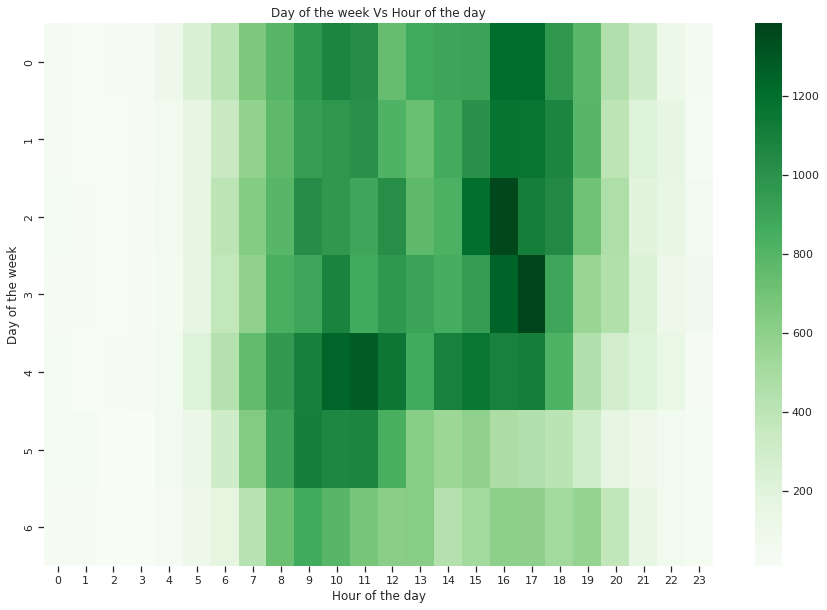

In [50]:
grp = data.groupby(['Dow','Hod'])['followers'].aggregate('count').reset_index()
grp = grp.pivot(index='Dow',columns='Hod',values='followers')
plt.figure(figsize=(15,10))
sns.heatmap(grp,cmap='Greens')
plt.title("Day of the week Vs Hour of the day")
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

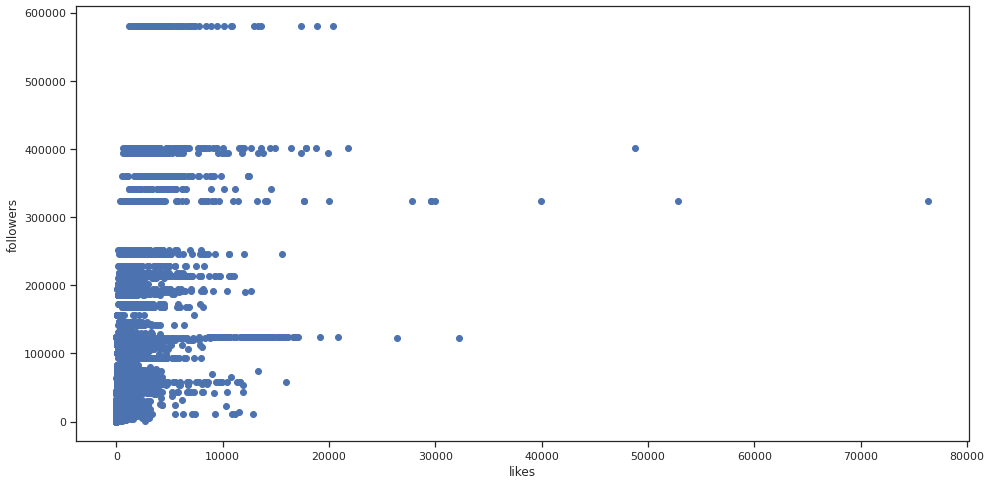

In [51]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['likes'], data['followers'])
ax.set_xlabel('likes')
ax.set_ylabel('followers')
plt.show()

In [52]:
data['mon']=(data['Dow']==0).astype(int)
data['tue']=(data['Dow']==1).astype(int)
data['wed']=(data['Dow']==2).astype(int)
data['thu']=(data['Dow']==3).astype(int)
data['fri']=(data['Dow']==4).astype(int)  
data['sat']=(data['Dow']==5).astype(int)
data['sun']=(data['Dow']==6).astype(int)

In [53]:
data = data.drop(['Dow'], axis=1)
data.drop(['datetime'], axis=1, inplace=True)

In [54]:
data.drop(['comments'], axis=1, inplace=True)
data.drop(['Date'], axis=1, inplace=True)
data=data.astype(str)

In [55]:
data.head()

,caption,profile_name,biography,following,likes,posts_count,followers,REGION,caption_length,biography_length,...,INDUSTRY_retail,INDUSTRY_sport & recreation,Hod,mon,tue,wed,thu,fri,sat,sun
0,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,29.0,280.0,8702.0,UK,121.0,149.0,...,0,0,9,0,0,0,0,0,0,1
1,New cakes on our counters 😋😋,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,44.0,280.0,8702.0,UK,28.0,149.0,...,0,0,13,0,0,0,1,0,0,0
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,209.0,280.0,8702.0,UK,259.0,149.0,...,0,0,11,0,0,1,0,0,0,0
3,"New addition to our selection of sandwiches, o...",Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,95.0,280.0,8702.0,UK,138.0,149.0,...,0,0,12,0,0,0,0,1,0,0
4,We are currently closed as we move into our ne...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,101.0,280.0,8702.0,UK,256.0,149.0,...,0,0,5,0,0,0,1,0,0,0


In [56]:
def label(column):    
    le = preprocessing.LabelEncoder()
    le.fit(data[column])
    list(le.classes_)
    num=le.transform(data[column])
    data[column]=num

In [57]:
data

,caption,profile_name,biography,following,likes,posts_count,followers,REGION,caption_length,biography_length,...,INDUSTRY_retail,INDUSTRY_sport & recreation,Hod,mon,tue,wed,thu,fri,sat,sun
0,It’s our last Pizza Sunday at the arch today. ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,29.0,280.0,8702.0,UK,121.0,149.0,...,0,0,9,0,0,0,0,0,0,1
1,New cakes on our counters 😋😋,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,44.0,280.0,8702.0,UK,28.0,149.0,...,0,0,13,0,0,0,1,0,0,0
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,209.0,280.0,8702.0,UK,259.0,149.0,...,0,0,11,0,0,1,0,0,0,0
3,"New addition to our selection of sandwiches, o...",Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,95.0,280.0,8702.0,UK,138.0,149.0,...,0,0,12,0,0,0,0,1,0,0
4,We are currently closed as we move into our ne...,Yeast Bakery,We are now open at our new site: Unit 1 Canal ...,352.0,101.0,280.0,8702.0,UK,256.0,149.0,...,0,0,5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,Day 2 Christmas brochure tour Day one brochure...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,10.0,1863.0,2321.0,UK,278.0,150.0,...,1,0,9,0,0,0,0,1,0,0
88510,#ArmisticeDay #poppy #lestwerespect,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,50.0,1863.0,2321.0,UK,35.0,150.0,...,1,0,8,0,0,0,1,0,0,0
88511,There’s only one turkey and the best place to ...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,8.0,1863.0,2321.0,UK,266.0,150.0,...,1,0,13,0,0,1,0,0,0,0
88512,Day one brochure tour !! #sandysfishmongers #b...,Fishmongers/ButchersTwickenham,"Local Family Fishmongers & Butchers , fresh fi...",579.0,9.0,1863.0,2321.0,UK,241.0,150.0,...,1,0,13,0,0,1,0,0,0,0


In [58]:
data.columns

Index(['caption', 'profile_name', 'biography', 'following', 'likes',
       'posts_count', 'followers', 'REGION', 'caption_length',
       'biography_length', 'po_co', 'pof', 'user_count', 'profile_name_len',
       'fol', 'act', 'pos', 'comments_max', 'comments_min', 'comments_mean',
       'comments_std', 'comments_followers', 'followers_comments_mean', 'fol2',
       'fol_pos', 'fol_pow', 'po_co_pow', 'comments_mean_diff',
       'INDUSTRY_childcare', 'INDUSTRY_cosmetics', 'INDUSTRY_fashion',
       'INDUSTRY_fitness', 'INDUSTRY_hospitality', 'INDUSTRY_real estate',
       'INDUSTRY_retail', 'INDUSTRY_sport & recreation', 'Hod', 'mon', 'tue',
       'wed', 'thu', 'fri', 'sat', 'sun'],
      dtype='object')

In [59]:
dropped = ['INDUSTRY_fashion','INDUSTRY_retail','profile_name','REGION','biography','INDUSTRY_childcare','INDUSTRY_fitness','INDUSTRY_sport & recreation','INDUSTRY_childcare','INDUSTRY_real estate']
data.drop(dropped,axis=1,inplace=True)
data

,caption,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,user_count,...,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,tue,wed,thu,fri,sat,sun
0,It’s our last Pizza Sunday at the arch today. ...,352.0,29.0,280.0,8702.0,121.0,149.0,280.0,0.7932011331444759,60,...,0,1,9,0,0,0,0,0,0,1
1,New cakes on our counters 😋😋,352.0,44.0,280.0,8702.0,28.0,149.0,280.0,0.7932011331444759,60,...,0,1,13,0,0,0,1,0,0,0
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,352.0,209.0,280.0,8702.0,259.0,149.0,28.0,0.7932011331444759,60,...,0,1,11,0,0,1,0,0,0,0
3,"New addition to our selection of sandwiches, o...",352.0,95.0,280.0,8702.0,138.0,149.0,70.0,0.7932011331444759,60,...,0,1,12,0,0,0,0,1,0,0
4,We are currently closed as we move into our ne...,352.0,101.0,280.0,8702.0,256.0,149.0,40.0,0.7932011331444759,60,...,0,1,5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,Day 2 Christmas brochure tour Day one brochure...,579.0,10.0,1863.0,2321.0,278.0,150.0,931.5,3.212068965517241,111,...,0,0,9,0,0,0,0,1,0,0
88510,#ArmisticeDay #poppy #lestwerespect,579.0,50.0,1863.0,2321.0,35.0,150.0,1863.0,3.212068965517241,111,...,0,0,8,0,0,0,1,0,0,0
88511,There’s only one turkey and the best place to ...,579.0,8.0,1863.0,2321.0,266.0,150.0,1863.0,3.212068965517241,111,...,0,0,13,0,0,1,0,0,0,0
88512,Day one brochure tour !! #sandysfishmongers #b...,579.0,9.0,1863.0,2321.0,241.0,150.0,1863.0,3.212068965517241,111,...,0,0,13,0,0,1,0,0,0,0


In [60]:
# label('INDUSTRY')
# label('REGION')
# data.drop(['INDUSTRY'], axis=1, inplace=True)

In [61]:
data

,caption,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,user_count,...,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,tue,wed,thu,fri,sat,sun
0,It’s our last Pizza Sunday at the arch today. ...,352.0,29.0,280.0,8702.0,121.0,149.0,280.0,0.7932011331444759,60,...,0,1,9,0,0,0,0,0,0,1
1,New cakes on our counters 😋😋,352.0,44.0,280.0,8702.0,28.0,149.0,280.0,0.7932011331444759,60,...,0,1,13,0,0,0,1,0,0,0
2,🔺Opening Times for Half Term🔺: Hi everyone we ...,352.0,209.0,280.0,8702.0,259.0,149.0,28.0,0.7932011331444759,60,...,0,1,11,0,0,1,0,0,0,0
3,"New addition to our selection of sandwiches, o...",352.0,95.0,280.0,8702.0,138.0,149.0,70.0,0.7932011331444759,60,...,0,1,12,0,0,0,0,1,0,0
4,We are currently closed as we move into our ne...,352.0,101.0,280.0,8702.0,256.0,149.0,40.0,0.7932011331444759,60,...,0,1,5,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,Day 2 Christmas brochure tour Day one brochure...,579.0,10.0,1863.0,2321.0,278.0,150.0,931.5,3.212068965517241,111,...,0,0,9,0,0,0,0,1,0,0
88510,#ArmisticeDay #poppy #lestwerespect,579.0,50.0,1863.0,2321.0,35.0,150.0,1863.0,3.212068965517241,111,...,0,0,8,0,0,0,1,0,0,0
88511,There’s only one turkey and the best place to ...,579.0,8.0,1863.0,2321.0,266.0,150.0,1863.0,3.212068965517241,111,...,0,0,13,0,0,1,0,0,0,0
88512,Day one brochure tour !! #sandysfishmongers #b...,579.0,9.0,1863.0,2321.0,241.0,150.0,1863.0,3.212068965517241,111,...,0,0,13,0,0,1,0,0,0,0


In [62]:
data.to_csv('/content/drive/MyDrive/NLP/2.csv')

In [63]:
data.drop(['caption'], axis=1, inplace=True)

In [64]:
data.head()

,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,user_count,profile_name_len,...,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,tue,wed,thu,fri,sat,sun
0,352.0,29.0,280.0,8702.0,121.0,149.0,280.0,0.7932011331444759,60,12.0,...,0,1,9,0,0,0,0,0,0,1
1,352.0,44.0,280.0,8702.0,28.0,149.0,280.0,0.7932011331444759,60,12.0,...,0,1,13,0,0,0,1,0,0,0
2,352.0,209.0,280.0,8702.0,259.0,149.0,28.0,0.7932011331444759,60,12.0,...,0,1,11,0,0,1,0,0,0,0
3,352.0,95.0,280.0,8702.0,138.0,149.0,70.0,0.7932011331444759,60,12.0,...,0,1,12,0,0,0,0,1,0,0
4,352.0,101.0,280.0,8702.0,256.0,149.0,40.0,0.7932011331444759,60,12.0,...,0,1,5,0,0,0,1,0,0,0


## Normalizing

In [65]:
df = pd.DataFrame(data)
data=df.astype(str)
normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

In [66]:
clean_dataset(normalized_df)

,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,user_count,profile_name_len,...,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,tue,wed,thu,fri,sat,sun
0,0.046927,0.000380,0.040329,0.014783,0.054570,0.993056,0.042513,0.000589,0.296482,0.357143,...,0.0,1.0,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.046927,0.000576,0.040329,0.014783,0.012278,0.993056,0.042513,0.000589,0.296482,0.357143,...,0.0,1.0,0.565217,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.046927,0.002738,0.040329,0.014783,0.117326,0.993056,0.004250,0.000589,0.296482,0.357143,...,0.0,1.0,0.478261,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.046927,0.001245,0.040329,0.014783,0.062301,0.993056,0.010627,0.000589,0.296482,0.357143,...,0.0,1.0,0.521739,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.046927,0.001323,0.040329,0.014783,0.115962,0.993056,0.006072,0.000589,0.296482,0.357143,...,0.0,1.0,0.217391,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,0.077190,0.000131,0.281236,0.003780,0.125966,1.000000,0.141435,0.002422,0.552764,1.000000,...,0.0,0.0,0.391304,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88510,0.077190,0.000655,0.281236,0.003780,0.015462,1.000000,0.282872,0.002422,0.552764,1.000000,...,0.0,0.0,0.347826,0.0,0.0,0.0,1.0,0.0,0.0,0.0
88511,0.077190,0.000105,0.281236,0.003780,0.120509,1.000000,0.282872,0.002422,0.552764,1.000000,...,0.0,0.0,0.565217,0.0,0.0,1.0,0.0,0.0,0.0,0.0
88512,0.077190,0.000118,0.281236,0.003780,0.109141,1.000000,0.282872,0.002422,0.552764,1.000000,...,0.0,0.0,0.565217,0.0,0.0,1.0,0.0,0.0,0.0,0.0


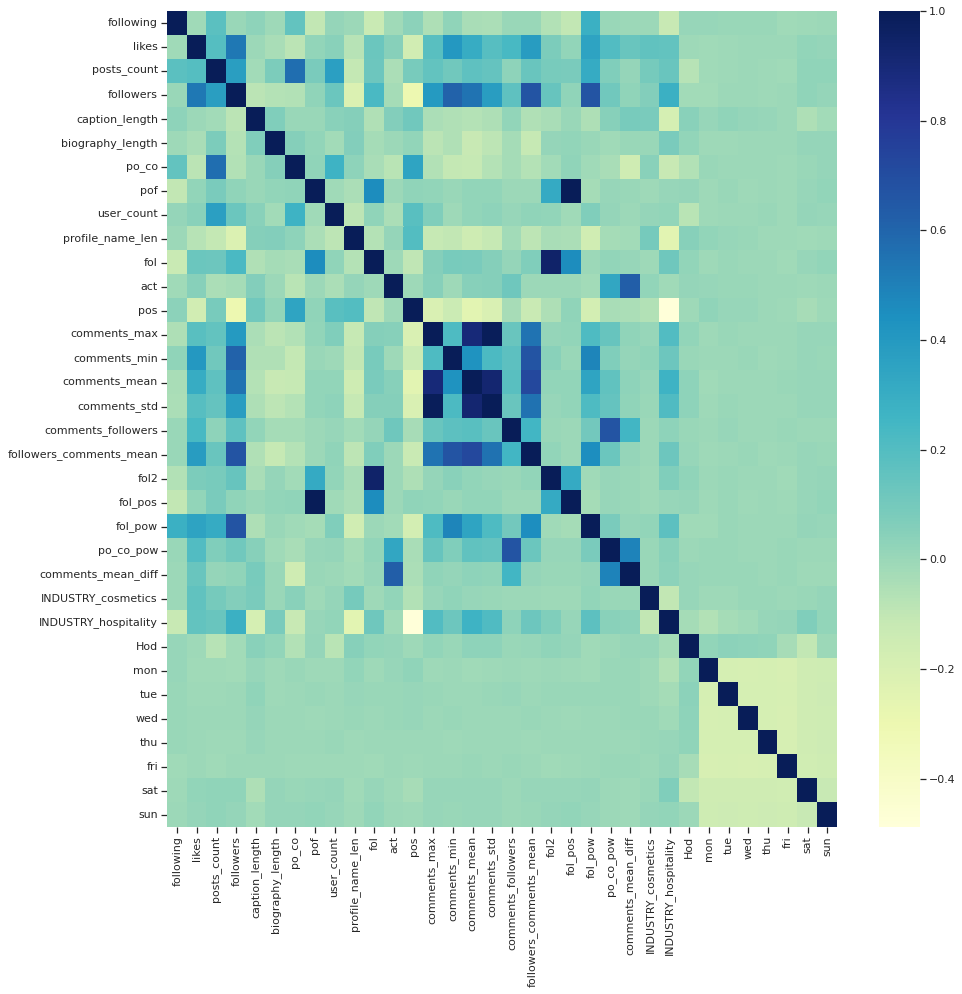

In [67]:
%matplotlib inline
plt.figure(figsize=(15,15))
sns.heatmap(normalized_df.corr(),cmap="YlGnBu")
plt.show()

In [68]:
y=normalized_df["likes"]
X = normalized_df.drop('likes', axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [70]:
#Converting the columns into the float datatype
a=['following','posts_count','Hod','mon','tue','wed','thu','fri','sat','sun']
for i in a:
  data[i]= data[i].astype(str).astype(float)
data

,following,likes,posts_count,followers,caption_length,biography_length,po_co,pof,user_count,profile_name_len,...,INDUSTRY_cosmetics,INDUSTRY_hospitality,Hod,mon,tue,wed,thu,fri,sat,sun
0,352.0,29.0,280.0,8702.0,121.0,149.0,280.0,0.7932011331444759,60,12.0,...,0,1,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,352.0,44.0,280.0,8702.0,28.0,149.0,280.0,0.7932011331444759,60,12.0,...,0,1,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,352.0,209.0,280.0,8702.0,259.0,149.0,28.0,0.7932011331444759,60,12.0,...,0,1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,352.0,95.0,280.0,8702.0,138.0,149.0,70.0,0.7932011331444759,60,12.0,...,0,1,12.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,352.0,101.0,280.0,8702.0,256.0,149.0,40.0,0.7932011331444759,60,12.0,...,0,1,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88509,579.0,10.0,1863.0,2321.0,278.0,150.0,931.5,3.212068965517241,111,30.0,...,0,0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
88510,579.0,50.0,1863.0,2321.0,35.0,150.0,1863.0,3.212068965517241,111,30.0,...,0,0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
88511,579.0,8.0,1863.0,2321.0,266.0,150.0,1863.0,3.212068965517241,111,30.0,...,0,0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
88512,579.0,9.0,1863.0,2321.0,241.0,150.0,1863.0,3.212068965517241,111,30.0,...,0,0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
# hyperparameterTuning_XGBoost(X_train,y_train)

In [72]:
dict_info = {'Model': [], 'RMSE': [], 'R2': [],'MAE': [], 'RMSLE': [],'max_error_':[]}

## Models

### LightLGBM

In [73]:
model_lgb = LGBMRegressor(colsample_bytree=0.8,learning_rate=0.01, max_depth=8,min_child_weight=1, min_split_gain=0.0222415, n_estimators=35000,num_leaves=966, reg_alpha=0.04, reg_lambda=0.073,subsample=0.6)
# start = datetime.datetime.now()
lgbm = model_lgb.fit(X_train, y_train,eval_set=[(X_train, y_train), (X_test, y_test)],eval_metric ='mae')
# end = datetime.datetime.now()
# end-start

Streaming output truncated to the last 5000 lines.
[30001]	training's l2: 5.80792e-05	training's l1: 0.00176692	valid_1's l2: 7.42984e-05	valid_1's l1: 0.00182482
[30002]	training's l2: 5.80792e-05	training's l1: 0.00176692	valid_1's l2: 7.42984e-05	valid_1's l1: 0.00182482
[30003]	training's l2: 5.80792e-05	training's l1: 0.00176692	valid_1's l2: 7.42984e-05	valid_1's l1: 0.00182482
[30004]	training's l2: 5.80792e-05	training's l1: 0.00176692	valid_1's l2: 7.42984e-05	valid_1's l1: 0.00182482
[30005]	training's l2: 5.80792e-05	training's l1: 0.00176692	valid_1's l2: 7.42984e-05	valid_1's l1: 0.00182482
[30006]	training's l2: 5.80792e-05	training's l1: 0.00176692	valid_1's l2: 7.42984e-05	valid_1's l1: 0.00182482
[30007]	training's l2: 5.80792e-05	training's l1: 0.00176692	valid_1's l2: 7.42984e-05	valid_1's l1: 0.00182482
[30008]	training's l2: 5.80792e-05	training's l1: 0.00176692	valid_1's l2: 7.42984e-05	valid_1's l1: 0.00182482
[30009]	training's l2: 5.80792e-05	training's l1: 0.0

In [74]:
y_pred_lgbm = lgbm.predict(X_test)
lgbm.score(X_test, y_test)

0.5778146231404545

In [75]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test,y_pred_lgbm)

dict_info['Model'].append('Lightgbm')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### XGBoost 

In [76]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.7, learning_rate = 0.03,max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,subsample=0.7,random_state=random_state)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

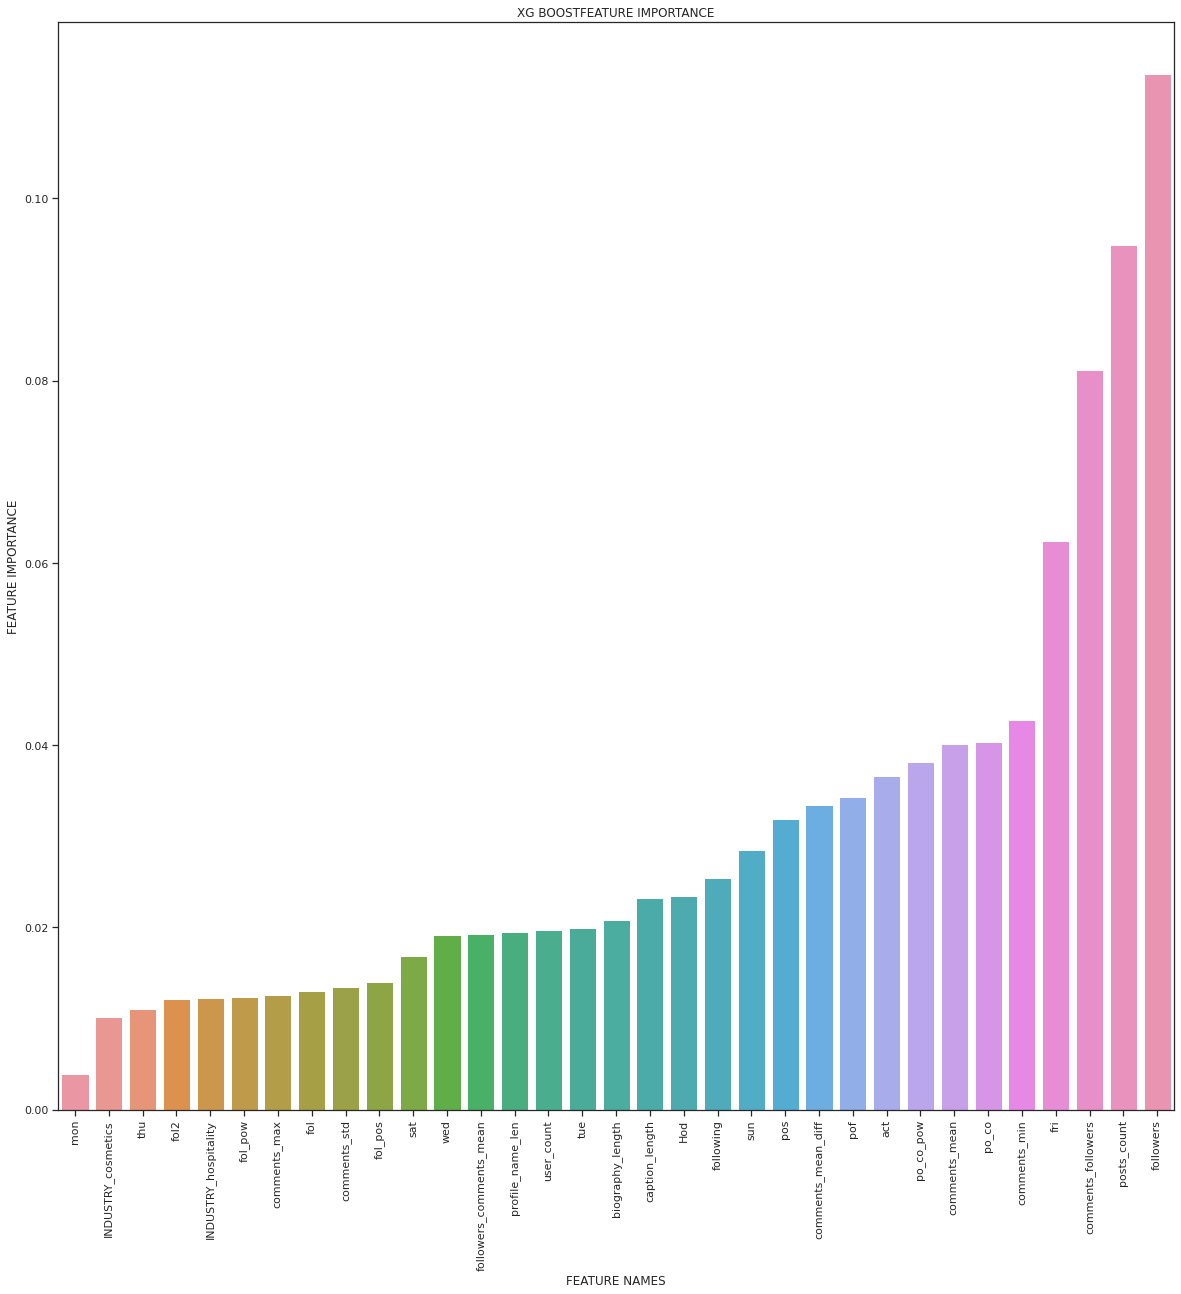

In [77]:
plot_feature_importance(xg_reg.feature_importances_,X_train.columns,'XG BOOST')

In [78]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test,y_pred)

dict_info['Model'].append('XGboost')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### Random Forest

In [79]:
# hyperparameterTuning_RandomForest(X_train,y_train)

In [80]:
rnd_clf = RandomForestRegressor(n_estimators=20, min_samples_split=6, min_samples_leaf=4,max_features='auto',max_depth=10,bootstrap=True,random_state=random_state)
rnd_clf.fit(X_train, y_train)
y_pred_rnd_clf = rnd_clf.predict(X_test)

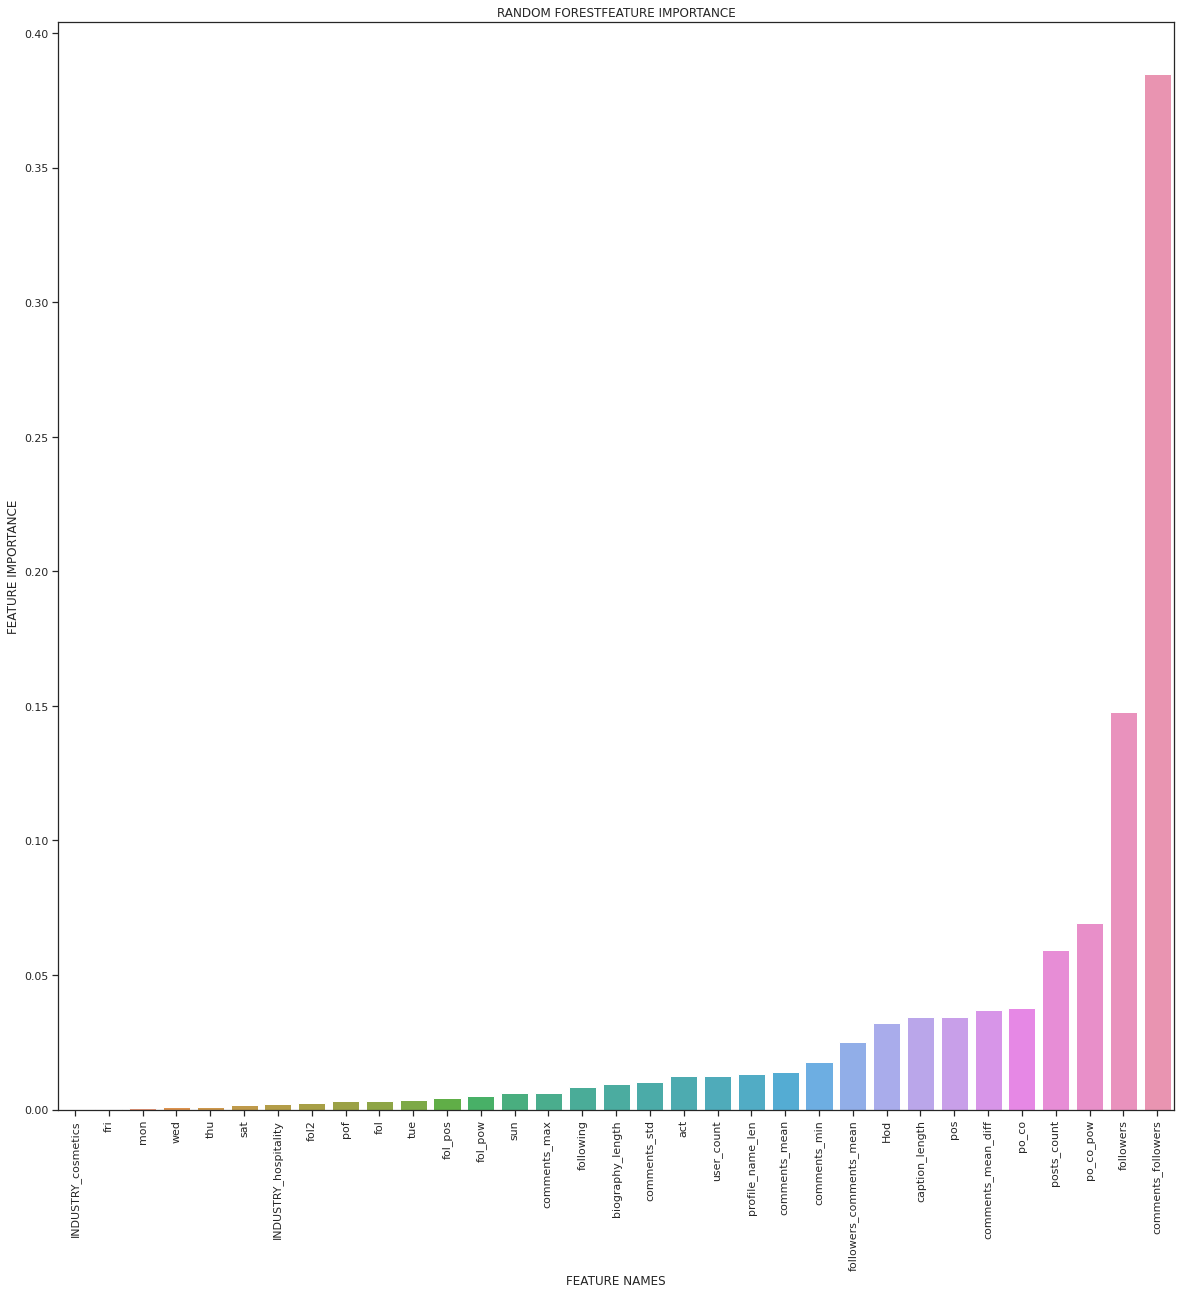

In [81]:
plot_feature_importance(rnd_clf.feature_importances_,X_train.columns,'RANDOM FOREST')

In [82]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test,y_pred_rnd_clf)

dict_info['Model'].append('Random Forest')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### MLP Regressor

In [83]:
# hyperparameterTuning_MLP(X_train,y_train)

In [84]:
from sklearn.neural_network import MLPRegressor
mlp_GS = MLPRegressor(activation='relu',alpha=0.001,hidden_layer_sizes=(50, 50, 50),learning_rate='constant',solver='adam',random_state=random_state)
mlp_GS.fit(X_train, y_train)
y_pred_mlp = mlp_GS.predict(X_test)

In [85]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test,y_pred_mlp)

dict_info['Model'].append('MLP')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

### SVM

In [86]:
svr= LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,tol=0.0001, verbose=0,random_state=random_state)
svr.fit(X_train, y_train)
y_pred_SVR = svr.predict(X_test)

In [87]:
rmse,R2,MAE,MSE,RMSLE,max_error_= metrics(y_test,y_pred_SVR)

dict_info['Model'].append('SVR')
dict_info['RMSE'].append(rmse)
dict_info['R2'].append(R2)
dict_info['MAE'].append(MAE)
dict_info['RMSLE'].append(RMSLE)
dict_info['max_error_'].append(max_error_)

In [88]:
dfData = pd.DataFrame(dict_info)
dfData

,Model,RMSE,R2,MAE,RMSLE,max_error_
0,Lightgbm,0.008620,0.577815,0.001825,-4.753710,0.533904
1,XGboost,0.007876,0.647521,0.001464,-4.843937,0.520647
2,Random Forest,0.007606,0.671264,0.001413,-4.878805,0.509198
3,MLP,0.009841,0.449671,0.002749,-4.621175,0.561765
4,SVR,0.013675,-0.062642,0.003320,-4.292176,0.639221
